## Step 1: Loading Data 

In [ ]:
!pip install --upgrade pandas==1.2

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 9.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=cf9d79aa51cd7d0fc4669dba72d745838f2e0f320a9fdcea3aafe3e284298e15
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
!pip install gensim

In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data into papers
papers = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/Colab Notebooks/Test/data.csv")

In [ ]:
# Print head
papers.head()

,Комментарий,"Пол (0 - м, 1 - ж)"
0,"Мой муж пока не работает, 2 месяца уже ищет ра...",1
1,Поэтому я и не спешу замуж😆,1
2,😀 Зато замужем.,1
3,"Помогает. Инициативы не проявляет, но делает в...",1
4,У меня работает на двух работах и успевает мне...,1


##Step 2: Data Cleaning 

In [ ]:
# Remove the columns
papers = papers.drop(columns=['Пол (0 - м, 1 - ж)'], axis=1).sample(100)

In [ ]:
# Print out the first rows of papers
papers.head()

,Комментарий
50,"Скажите ему, что в таком случае добывать деньг..."
158,"Муж не должен ""помогать"", он должен нести таку..."
179,нет конечно. Муж сам должен все вывозить.
200,ЖЕНЩИНА НИЧЕГО НИКОМУ НЕ ДОЛЖНА
69,Интересно! Вы замужем или в поисках прынца?


**Remove punctuation/lower casing**

In [ ]:
# Load the regular expression library
import re

In [ ]:
# Remove punctuation
papers['Комментарий_processed'] = \
papers['Комментарий'].map(lambda x: re.sub('[,\.!?]', '', x))

In [ ]:
# Convert the titles to lowercase
papers['Комментарий_processed'] = \
papers['Комментарий_processed'].map(lambda x: x.lower())

In [ ]:
# Print out the first rows of papers
papers['Комментарий_processed'].head()

50     скажите ему что в таком случае добывать деньги...
158    муж не должен "помогать" он должен нести такую...
179              нет конечно муж сам должен все вывозить
200                      женщина ничего никому не должна
69             интересно вы замужем или в поисках прынца
Name: Комментарий_processed, dtype: object

##Step 3: Exploratory Analysis

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 8.2 MB 10.9 MB/s 


In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text):
    words = text.split() # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)

    return res

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(papers['Комментарий_processed'].values))

In [ ]:
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in (lemmatize(long_string))])

In [ ]:
lemmatized_output

'сказать он что в такой случай добывать деньга – это мужской обязанность и уходить с работы,муж не должный "помогать" он должный нести такой же ответственность за дом как и вы в ваш случай он должный взять всё домашний дело на себя тк он не работать и это не обсуждаться но если вы ловить кайф от унижение и страдание - ваш право,нуть конечно муж сам должный всё вывозить,женщина ничего никто не должна,интересный вы замужем или в поиск прынца,проснуться с утрец сготовить на скорый рука завтрак попить с муж кофеёк проводить спокойно на работа привести себя в порядок сфотографировать в зеркало губы-уточка отправить муж ммс поехать на служба поработать работа пара раз написать он что он самый хороший на земля и вечером он ждать сюрпрайза поехать к подруга попить с они чай по дорога в магазин купить еда и новый трус приехать домой сварить суп накормить муж достать рукоделие - 30 минута релакс дать он время морально подготовиться к сюрприз загадочно иногда поднимать на он глаз после весь любов

In [ ]:
!pip install nltk

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer 

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
word_list_test = nltk.word_tokenize(long_string)

In [ ]:
print(word_list_test)

['скажите', 'ему', 'что', 'в', 'таком', 'случае', 'добывать', 'деньги', '–', 'это', 'мужская', 'обязанность', 'и', 'уходите', 'с', 'работы', ',', 'муж', 'не', 'должен', '``', 'помогать', "''", 'он', 'должен', 'нести', 'такую', 'же', 'ответственность', 'за', 'дом', 'как', 'и', 'вы', 'в', 'вашем', 'случае', 'он', 'должен', 'взять', 'все', 'домашние', 'дела', 'на', 'себя', 'тк', 'он', 'не', 'работает', 'и', 'это', 'не', 'обсуждается', 'но', 'если', 'вы', 'ловите', 'кайф', 'от', 'унижения', 'и', 'страданий', '-', 'ваше', 'право', ',', 'нет', 'конечно', 'муж', 'сам', 'должен', 'все', 'вывозить', ',', 'женщина', 'ничего', 'никому', 'не', 'должна', ',', 'интересно', 'вы', 'замужем', 'или', 'в', 'поисках', 'прынца', ',', 'проснулась', 'с', 'утреца', 'сготовила', 'на', 'скорую', 'руку', 'завтрак', 'попила', 'с', 'мужем', 'кофейку', 'проводила', 'спокойно', 'на', 'работу', 'привела', 'себя', 'в', 'порядок', 'сфотографировала', 'в', 'зеркало', 'губы-уточкой', 'отправила', 'мужу', 'ммс', 'поехала'

In [ ]:
lemmatized_output2 = ' '.join([lemmatizer.lemmatize(w) for w in word_list_test])
print(lemmatized_output2)

скажите ему что в таком случае добывать деньги – это мужская обязанность и уходите с работы , муж не должен `` помогать '' он должен нести такую же ответственность за дом как и вы в вашем случае он должен взять все домашние дела на себя тк он не работает и это не обсуждается но если вы ловите кайф от унижения и страданий - ваше право , нет конечно муж сам должен все вывозить , женщина ничего никому не должна , интересно вы замужем или в поисках прынца , проснулась с утреца сготовила на скорую руку завтрак попила с мужем кофейку проводила спокойно на работу привела себя в порядок сфотографировала в зеркало губы-уточкой отправила мужу ммс поехала на службу поработала работу пару раз написала ему что он самый лучший на земле и вечером его ждет сюрпрайз поехала к подругам попила с ними чаю по дороге в магазин купила еды и новые трусы приехала домой сварила суп накормила мужа достала рукоделие - 30 минут релакса дала ему время морально подготовиться к сюрпризу загадочно иногда поднимая на н

In [ ]:
#Adding additional stowords
stop_words = stopwords.words('russian')
stop_words.extend(['это', 'сама', 'какие', 'пока', 'ещё', 'оба', 'свои', 'мужа', 'дому', 'дом', 'либо', 'хотя', 'нужно', 'знаю', 'кого', 'вообще'])

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(stopwords = stop_words, background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

In [ ]:
# Generate a word cloud
wordcloud.generate(lemmatized_output)

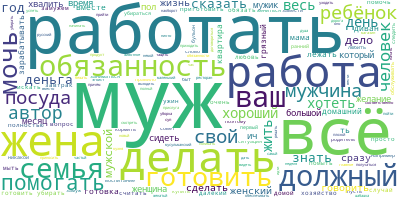

In [ ]:
# Visualize the word cloud
wordcloud.to_image()

##Step 4: Prepare text for LDA analysis

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('russian')
stop_words.extend(['это', 'сама', 'какие', 'пока', 'ещё', 'оба', 'свои', 'мужа', 'дому', 'дом', 'либо', 'хотя', 'нужно', 'знаю', 'кого', 'вообще'])

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [ ]:
word_list_final = nltk.word_tokenize(lemmatized_output)

In [ ]:
word_list_final

['сказать',
 'он',
 'что',
 'в',
 'такой',
 'случай',
 'добывать',
 'деньга',
 '–',
 'это',
 'мужской',
 'обязанность',
 'и',
 'уходить',
 'с',
 'работы',
 ',',
 'муж',
 'не',
 'должный',
 '``',
 'помогать',
 "''",
 'он',
 'должный',
 'нести',
 'такой',
 'же',
 'ответственность',
 'за',
 'дом',
 'как',
 'и',
 'вы',
 'в',
 'ваш',
 'случай',
 'он',
 'должный',
 'взять',
 'всё',
 'домашний',
 'дело',
 'на',
 'себя',
 'тк',
 'он',
 'не',
 'работать',
 'и',
 'это',
 'не',
 'обсуждаться',
 'но',
 'если',
 'вы',
 'ловить',
 'кайф',
 'от',
 'унижение',
 'и',
 'страдание',
 '-',
 'ваш',
 'право',
 ',',
 'нуть',
 'конечно',
 'муж',
 'сам',
 'должный',
 'всё',
 'вывозить',
 ',',
 'женщина',
 'ничего',
 'никто',
 'не',
 'должна',
 ',',
 'интересный',
 'вы',
 'замужем',
 'или',
 'в',
 'поиск',
 'прынца',
 ',',
 'проснуться',
 'с',
 'утрец',
 'сготовить',
 'на',
 'скорый',
 'рука',
 'завтрак',
 'попить',
 'с',
 'муж',
 'кофеёк',
 'проводить',
 'спокойно',
 'на',
 'работа',
 'привести',
 'себя',
 'в'

In [ ]:
data = word_list_final

In [ ]:
#data = papers.Комментарий_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['сказать']


In [ ]:
import gensim.corpora as corpora

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

In [ ]:
# Create Corpus
texts = data_words

In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View
print(corpus[:1][0][:30])

[(0, 1)]


## Step 5: LDA model tranining

In [ ]:
from pprint import pprint

# number of topics
num_topics = 4

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

In [ ]:
# Print the Keyword in the 4 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"готовить" + 0.028*"мочь" + 0.020*"работать" + 0.019*"семья" + '
  '0.016*"русскии" + 0.016*"какои" + 0.015*"автор" + 0.014*"женскии" + '
  '0.011*"ми" + 0.011*"наш"'),
 (1,
  '0.028*"помогать" + 0.024*"обязанность" + 0.014*"мужскои" + '
  '0.013*"хозяиство" + 0.013*"воспитание" + 0.010*"весь" + 0.009*"муж" + '
  '0.009*"полностью" + 0.009*"знать" + 0.008*"час"'),
 (2,
  '0.053*"муж" + 0.023*"мужчина" + 0.020*"ребенок" + 0.012*"такои" + '
  '0.010*"время" + 0.010*"семья" + 0.009*"человек" + 0.009*"ть" + '
  '0.007*"обязанности" + 0.007*"любить"'),
 (3,
  '0.041*"жена" + 0.025*"ваш" + 0.025*"хотеть" + 0.025*"должныи" + '
  '0.018*"работа" + 0.013*"мама" + 0.013*"которыи" + 0.012*"замужем" + '
  '0.011*"помощница" + 0.011*"воспитывать"')]


## Step 6: Analyzing our LDA model 

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Test/ldavis_prepared_russian_'+str(num_topics))

In [ ]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Colab Notebooks/Test/ldavis_prepared_russian_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.044703 -0.078245       1        1  25.704858
0     -0.129003  0.099035       2        1  25.374065
3      0.145057  0.084819       3        1  25.214423
1      0.028649 -0.105609       4        1  23.706655, topic_info=         Term       Freq      Total Category  logprob  loglift
9         муж  36.000000  36.000000  Default  30.0000  30.0000
100      жена  25.000000  25.000000  Default  29.0000  29.0000
95   готовить  20.000000  20.000000  Default  28.0000  28.0000
141      мочь  17.000000  17.000000  Default  27.0000  27.0000
11   помогать  16.000000  16.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
23   унижение   3.405958   4.216286   Topic4  -5.0564   1.2260
168     знать   4.721567   9.332011   Topic4  -4.7298   0.7581
9         муж   4.805705  36.887508   Topic4  -4.7121  -0.5987
120    делать   3.907294  10.885674   Topic4  -4.9191   0.4148
189     какои   3.517072  13.412734   Topic4  -5.0243   0.1008

[183 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
169       2  0.845139    автор
390       2  0.883142   бежать
1172      4  0.743085   бехать
1108      4  0.743003      бог
337       4  0.947403    браво
...     ...       ...      ...
896       4  0.813268      час
322       1  0.480447  человек
322       2  0.384358  человек
1147      1  0.918223    черта
1061      2  0.919032     этыи

[187 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])